In [3]:
import numpy as np
import pandas as pd
from time import time

def create_synthetic_data(N, M):
    # Create N samples with M binary features
    X = pd.DataFrame(np.random.randint(2, size=(N, M)), columns=[f"Feature_{i}" for i in range(M)])
    y = pd.Series(np.random.randint(2, size=N), name='Target')  # Binary target
    return X, y

from tree.base import DecisionTree

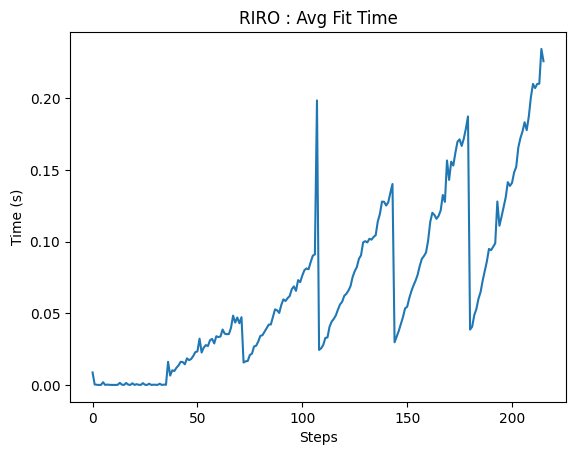

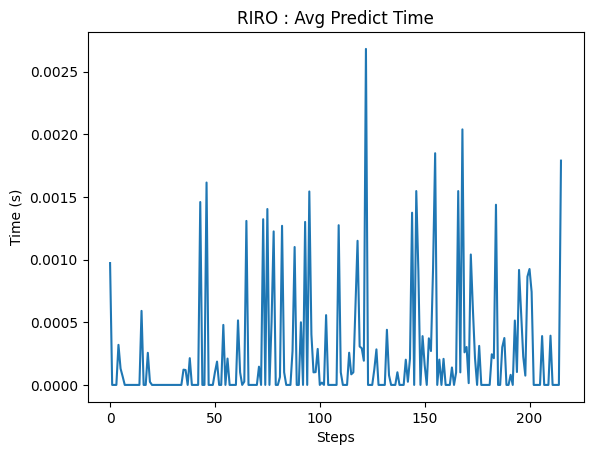

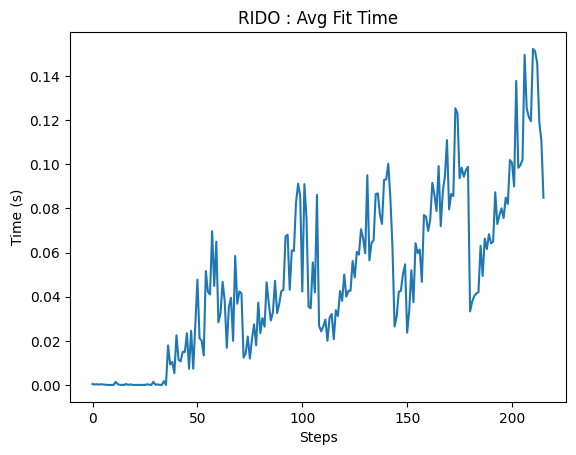

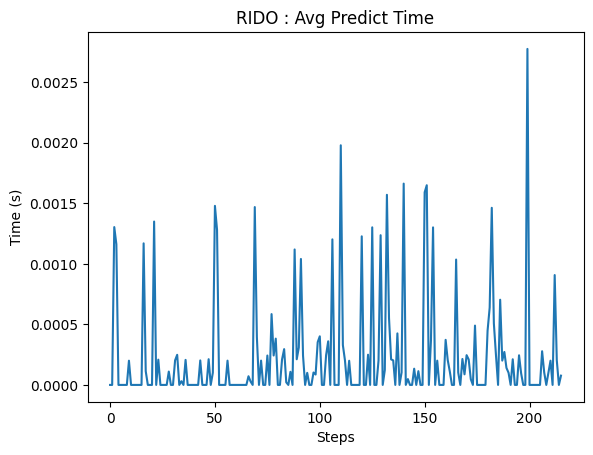

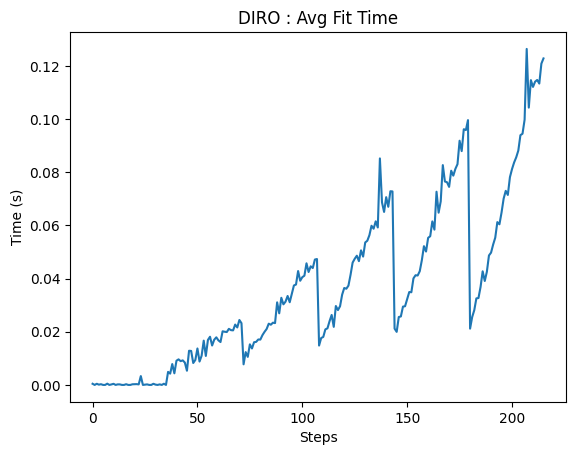

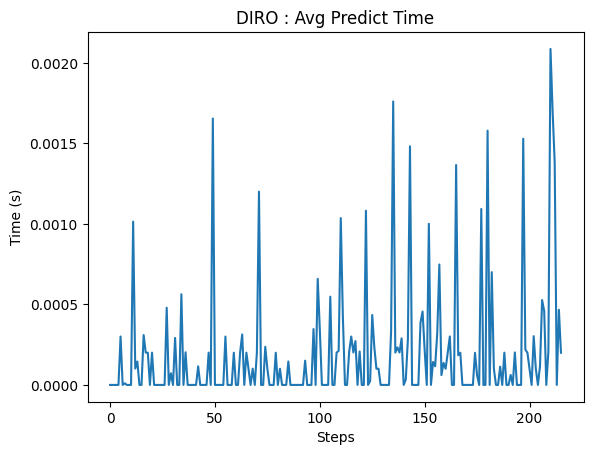

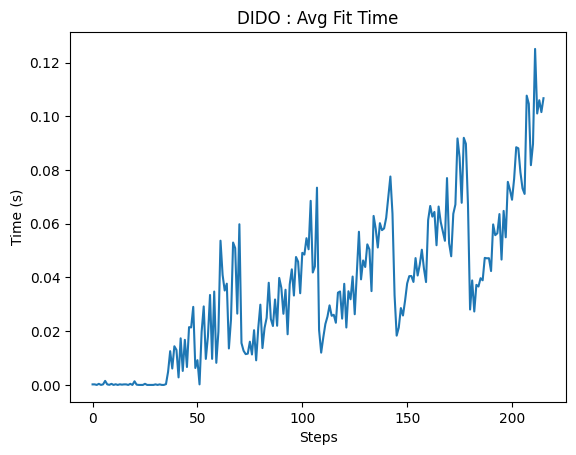

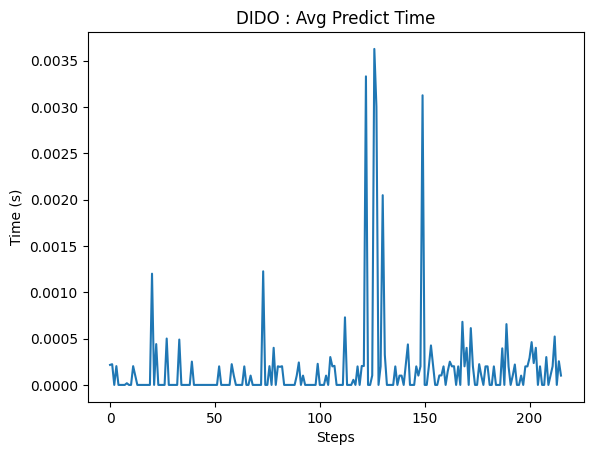

In [5]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tree.base import DecisionTree  # Make sure to import your DecisionTree class

# Function to run experiments for a specific case
def run_experiment(case_type, criterion, n_runs=5):
    learning_time_runs = []
    predict_time_runs = []
    
    for _ in range(n_runs):
        learning_time = []
        predict_time = []
        
        for Ni in range(1, 7):  # Number of samples
            for step in range(6, 42):  # Number of features
                N = Ni
                P = step
                
                # Generate data based on case type
                if case_type == 'RIRO':  # Real Input, Real Output
                    X = pd.DataFrame(np.random.randn(N, P))
                    y = pd.Series(np.random.randn(N))
                elif case_type == 'RIDO':  # Real Input, Discrete Output
                    X = pd.DataFrame(np.random.randn(N, P))
                    y = pd.Series(np.random.randint(2, size=N))
                elif case_type == 'DIRO':  # Discrete Input, Real Output
                    X = pd.DataFrame(np.random.randint(2, size=(N, P)))
                    y = pd.Series(np.random.randn(N))
                elif case_type == 'DIDO':  # Discrete Input, Discrete Output
                    X = pd.DataFrame(np.random.randint(2, size=(N, P)))
                    y = pd.Series(np.random.randint(2, size=N))
                
                # Fit the decision tree
                start_time = time.time()
                tree = DecisionTree(criterion=criterion)
                tree.fit(X, y)
                end_time = time.time()
                learning_time.append(end_time - start_time)

                # Predict using the trained tree
                start_time = time.time()
                y_hat = tree.predict(X)
                end_time = time.time()
                predict_time.append(end_time - start_time)
        
        # Store times for this run
        learning_time_runs.append(learning_time)
        predict_time_runs.append(predict_time)
    
    # Convert lists to numpy arrays for easier computation
    learning_time_runs = np.array(learning_time_runs)
    predict_time_runs = np.array(predict_time_runs)
    
    # Calculate the average time across all runs
    avg_learning_time = learning_time_runs.mean(axis=0)
    avg_predict_time = predict_time_runs.mean(axis=0)
    
    return avg_learning_time, avg_predict_time

# Run experiments for each case type and plot results
case_types = ['RIRO', 'RIDO', 'DIRO', 'DIDO']
criterion = 'information_gain'  # Or 'gini_index' based on your setup

for case_type in case_types:
    avg_learning_time, avg_predict_time = run_experiment(case_type, criterion)
    
    # Plot the average learning time
    plt.plot(avg_learning_time)
    plt.title(f'{case_type} : Avg Fit Time')
    plt.xlabel('Steps')
    plt.ylabel('Time (s)')
    plt.show()
    
    # Plot the average prediction time
    plt.plot(avg_predict_time)
    plt.title(f'{case_type} : Avg Predict Time')
    plt.xlabel('Steps')
    plt.ylabel('Time (s)')
    plt.show()


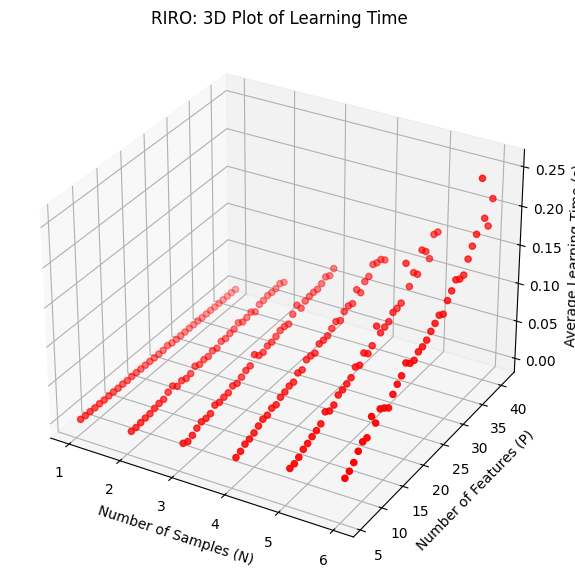

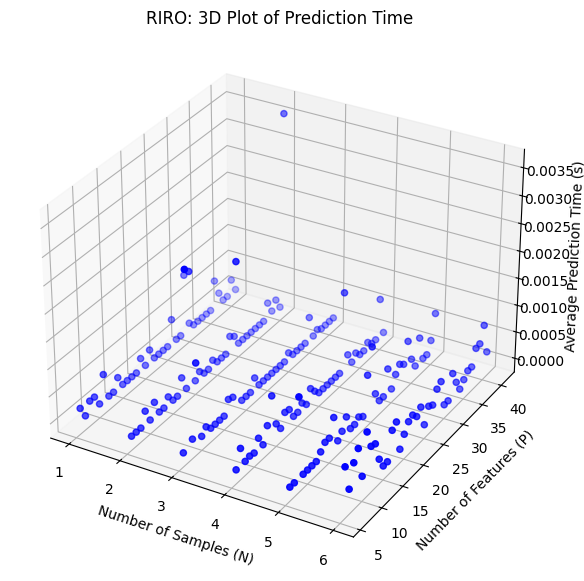

In [9]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tree.base import DecisionTree  # Import your DecisionTree class

def run_experiment_3d(case_type, criterion, n_runs=5):
    # Initialize lists to store data for 3D plot
    samples = []
    features = []
    avg_learning_times = []
    avg_predict_times = []

    for Ni in range(1, 7):  # Number of samples (N)
        for step in range(6, 42):  # Number of features (P)
            N = Ni
            P = step

            learning_times = []
            predict_times = []

            for _ in range(n_runs):  # Run multiple experiments to get average
                # Generate data based on case type
                if case_type == 'RIRO':  # Real Input, Real Output
                    X = pd.DataFrame(np.random.randn(N, P))
                    y = pd.Series(np.random.randn(N))
                elif case_type == 'RIDO':  # Real Input, Discrete Output
                    X = pd.DataFrame(np.random.randn(N, P))
                    y = pd.Series(np.random.randint(2, size=N))
                elif case_type == 'DIRO':  # Discrete Input, Real Output
                    X = pd.DataFrame(np.random.randint(2, size=(N, P)))
                    y = pd.Series(np.random.randn(N))
                elif case_type == 'DIDO':  # Discrete Input, Discrete Output
                    X = pd.DataFrame(np.random.randint(2, size=(N, P)))
                    y = pd.Series(np.random.randint(2, size=N))

                # Fit the decision tree
                start_time = time.time()
                tree = DecisionTree(criterion=criterion)
                tree.fit(X, y)
                end_time = time.time()
                learning_times.append(end_time - start_time)

                # Predict using the trained tree
                start_time = time.time()
                y_hat = tree.predict(X)
                end_time = time.time()
                predict_times.append(end_time - start_time)

            # Record the average time for the current N and P
            samples.append(N)
            features.append(P)
            avg_learning_times.append(np.mean(learning_times))
            avg_predict_times.append(np.mean(predict_times))

    return samples, features, avg_learning_times, avg_predict_times


# Run the experiment for a specific case type (e.g., RIRO)
case_type = 'RIRO'  # Change this to 'RIDO', 'DIRO', or 'DIDO' as needed
criterion = 'information_gain'

samples, features, avg_learning_time, avg_predict_time = run_experiment_3d(case_type, criterion)

# Convert lists to numpy arrays to avoid shape mismatch issues
samples = np.array(samples)
features = np.array(features)
avg_learning_time = np.array(avg_learning_time)
avg_predict_time = np.array(avg_predict_time)

# 3D Plot for Learning Time
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(samples, features, avg_learning_time, c='r', marker='o')

ax.set_xlabel('Number of Samples (N)')
ax.set_ylabel('Number of Features (P)')
ax.set_zlabel('Average Learning Time (s)')
ax.set_title(f'{case_type}: 3D Plot of Learning Time')
plt.show()

# 3D Plot for Prediction Time
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(samples, features, avg_predict_time, c='b', marker='o')

ax.set_xlabel('Number of Samples (N)')
ax.set_ylabel('Number of Features (P)')
ax.set_zlabel('Average Prediction Time (s)')
ax.set_title(f'{case_type}: 3D Plot of Prediction Time')
plt.show()
